In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"codesniper99","key":"2bf76cfeba1c3afc74e89027a5f9e043"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:04<00:00, 215MB/s]
100% 812M/812M [00:04<00:00, 204MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")


In [ ]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
            dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
from tensorflow import keras
from keras import layers



In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
new_base_dir / "train",
image_size=(180, 180),
batch_size=32)

validation_dataset = image_dataset_from_directory(
new_base_dir / "validation",
image_size=(180, 180),
batch_size=32)

test_dataset = image_dataset_from_directory(
new_base_dir / "test",
image_size=(180, 180),
batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch.keras",
save_best_only=True,
monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 170s 3s/step - loss: 0.7980 - accuracy: 0.5150 - val_loss: 0.6909 - val_accuracy: 0.5560
Epoch 2/30
63/63 [==============================] - 187s 3s/step - loss: 0.6953 - accuracy: 0.5470 - val_loss: 0.6997 - val_accuracy: 0.5190
Epoch 3/30
63/63 [==============================] - 165s 3s/step - loss: 0.6685 - accuracy: 0.6000 - val_loss: 0.7135 - val_accuracy: 0.5670
Epoch 4/30
63/63 [==============================] - 164s 3s/step - loss: 0.6252 - accuracy: 0.6450 - val_loss: 0.6005 - val_accuracy: 0.6810
Epoch 5/30
63/63 [==============================] - 160s 3s/step - loss: 0.5766 - accuracy: 0.6990 - val_loss: 0.6078 - val_accuracy: 0.6740
Epoch 6/30
63/63 [==============================] - 162s 3s/step - loss: 0.5497 - accuracy: 0.7255 - val_loss: 0.5507 - val_accuracy: 0.7240
Epoch 7/30
63/63 [==============================] - 164s 3s/step - loss: 0.4943 - accuracy: 0.7630 - val_loss: 0.6551 - val_accuracy: 0.7060
Epoch 8/30
63

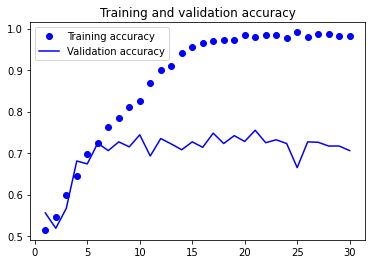

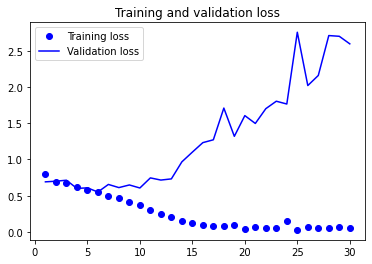

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 41s 637ms/step - loss: 0.5660 - accuracy: 0.7135
Test accuracy: 0.714


In [ ]:
data_augmentation = keras.Sequential(
    [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ]
)

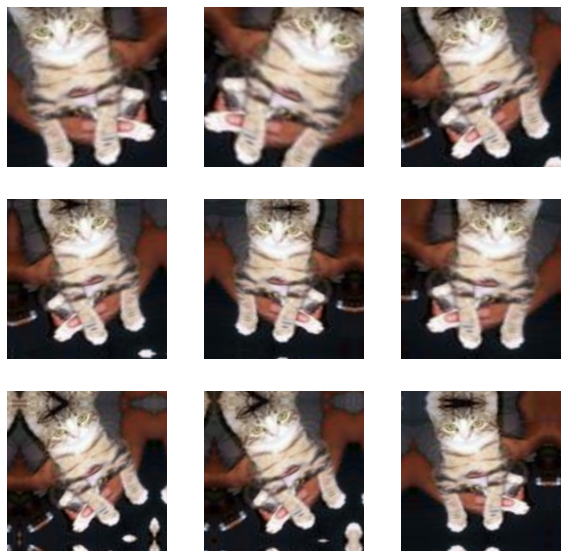

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
train_dataset,
epochs=100,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 9s 114ms/step - loss: 0.7416 - accuracy: 0.4985 - val_loss: 0.6910 - val_accuracy: 0.5970
Epoch 2/100
63/63 [==============================] - 7s 112ms/step - loss: 0.6951 - accuracy: 0.5185 - val_loss: 0.6881 - val_accuracy: 0.5330
Epoch 3/100
63/63 [==============================] - 7s 112ms/step - loss: 0.6972 - accuracy: 0.5320 - val_loss: 0.6714 - val_accuracy: 0.5920
Epoch 4/100
63/63 [==============================] - 7s 112ms/step - loss: 0.6873 - accuracy: 0.5860 - val_loss: 0.6697 - val_accuracy: 0.6360
Epoch 5/100
63/63 [==============================] - 7s 112ms/step - loss: 0.6669 - accuracy: 0.6210 - val_loss: 0.6422 - val_accuracy: 0.6360
Epoch 6/100
63/63 [==============================] - 7s 113ms/step - loss: 0.6377 - accuracy: 0.6550 - val_loss: 0.9429 - val_accuracy: 0.5340
Epoch 7/100
63/63 [==============================] - 7s 112ms/step - loss: 0.6253 - accuracy: 0.6455 - val_loss: 0.6102 - val_accuracy: 0.6900

In [ ]:
test_model = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 45ms/step - loss: 0.4791 - accuracy: 0.7880
Test accuracy: 0.788
